In [1]:
import igraph as ig
import pandas as pd

In [2]:
import sys
sys.path.append('../analysis_code/')
import shortest_function as sfn

In [4]:
G = ig.Graph.Read_GML('../0.preprocess_process/network_data/kowiki.gml')
name_list = pd.read_pickle('../0.preprocess_process/network_data/kowiki.pkl')

In [5]:
G.vs['_label'] = G.vs['label']
G.vs['name'] = name_list
G.vs['label'] = name_list

In [6]:
len(G.es)

3421520

In [7]:
len(G.vs)

646048

In [8]:
root_node = '과학기술'

In [9]:
name_list = pd.Series(G.vs['name'])
target_index = name_list[name_list == root_node]

In [10]:
path_arrays = sfn.calculate_all_shortest_path(G, target_index)

initiating calculation
CORE 1: 0.0%
CORE 0: 0.0%
CORE 2: 0.0%
CORE 4: 0.0%
CORE 5: 0.0%
CORE 6: 0.0%
CORE 7: 0.0%
CORE 3: 0.0%
CORE 10: 0.0%
CORE 8: 0.0%
CORE 11: 0.0%
CORE 9: 0.0%
CORE 12: 0.0%
CORE 13: 0.0%
CORE 14: 0.0%
result_collecting
CORE 15: 0.0%
CORE 16: 0.0%
CORE 17: 0.0%
CORE 18: 0.0%
CORE 19: 0.0%
CORE 15: 3.0957835428146865%
CORE 2: 3.0956877070241156%
CORE 13: 3.0957835428146865%
CORE 12: 3.0957835428146865%
CORE 19: 3.0957835428146865%
CORE 0: 3.0956877070241156%
CORE 16: 3.0957835428146865%
CORE 17: 3.0957835428146865%
CORE 4: 3.0956877070241156%
CORE 8: 3.0957835428146865%
CORE 11: 3.0957835428146865%
CORE 14: 3.0957835428146865%
CORE 1: 3.0956877070241156%
CORE 3: 3.0956877070241156%
CORE 10: 3.0957835428146865%
CORE 7: 3.0956877070241156%
CORE 9: 3.0957835428146865%
CORE 18: 3.0957835428146865%
CORE 5: 3.0956877070241156%
CORE 6: 3.0956877070241156%
CORE 15: 6.191567085629373%
CORE 19: 6.191567085629373%
CORE 0: 6.191375414048231%
CORE 17: 6.191567085629373%
CORE 10:

In [11]:
len(path_arrays)

646048

In [14]:
len_arrays= [(len(paths[0]), len(paths)) for i, paths in enumerate(path_arrays)]
shortest_arrays = [x[0] for x in len_arrays]
path_number_arrays = [x[1] for x in len_arrays]

In [15]:
G.vs['shortest_path'] = shortest_arrays

In [16]:
import numpy as np
np.save('calculate_result/path_array_ko', np.array(path_arrays))
np.save('calculate_result/path_number_before_ko', np.array(path_number_arrays))
np.save('calculate_result/path_length_before_ko', np.array(shortest_arrays))

In [17]:
max(path_number_arrays)

279

In [18]:
max(shortest_arrays)

15

In [19]:
importance_array = np.zeros(len(G.es))
importance_per_node = 1/len(G.es)
for idx, paths in enumerate(path_arrays):
    importance_per_path = importance_per_node/len(paths)
    for path in paths:
        eids = G.get_eids(path=path)
        if len(eids) != 0:
            importance_array[eids] += importance_per_path
    if idx % 100000 == 0:
        print(idx)

0
100000
200000
300000
400000
500000
600000


In [20]:
len(importance_array[importance_array == 0])

2452723

In [21]:
G.es['importance'] = importance_array
importance_array = pd.Series(importance_array)

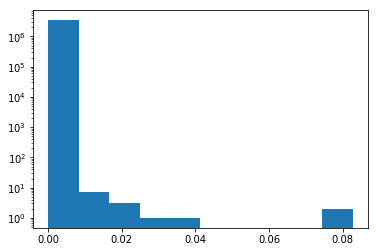

In [22]:
import matplotlib.pyplot as plt
plt.hist(importance_array)
plt.yscale('log', nonposy='clip')
plt.show()

In [23]:
def network_reduction(_threshold):
    reduction_link_list = [(G.vs[G.es[link_index].source]['name'], G.vs[G.es[link_index].target]['name']) for link_index in importance_array[importance_array > _threshold].index]
    reduction_vertex_list = list(set([x[0] for x in reduction_link_list] + [x[1] for x in reduction_link_list]))
    _G = ig.Graph(directed=True)
    _G.add_vertices(reduction_vertex_list)
    _G.add_edges(reduction_link_list)
    return _G

In [24]:
new_G = network_reduction(0)

In [25]:
len(G.es)

3421520

In [26]:
len(new_G.es)

968797

In [27]:
len(G.vs)

646048

In [28]:
len(new_G.vs)

646048

In [29]:
new_G.write("pruned_network//kowiki_pruned", format='net')
pd.Series(new_G.vs['name']).to_pickle('pruned_network//kowiki_pruned.pkl')

In [30]:
len(new_G.es)/len(new_G.vs)

1.4995743350339295

In [31]:
len(G.es)/len(G.vs)

5.296077071672693

In [32]:
len(new_G.es)/len(G.es)

0.28314813299352337